# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
#load CSV
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [3]:
#find the no.of rows and columns
df.shape

(804, 12)

In [4]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [5]:
# Finding the null values in dataset
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

# Tasks, Part 1

In [6]:
#load dataset
x=df["Mileage"]
y=df["Price"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

#reshape the data to fit the model
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Fit the model
reg=LinearRegression()


In [7]:
#1.FIND THE LINEAR REGRESSION EQUATION FOR MILEAGE VS PRICE.

reg.fit(x_train, y_train)
train_pred=reg.predict(x_train)
from sklearn import metrics
error_score=metrics.r2_score(y_train,train_pred)
#print(error_score)
coe=reg.coef_
inter=reg.intercept_
#print(coe,inter)
Y=(train_pred*coe)+inter
#print(Y)
error_score=metrics.r2_score(train_pred,Y)
#print(error_score)
reg.fit(x_test,y_test)
test_pred= reg.predict(x_test)
coe_test=reg.coef_
inter_test=reg.intercept_
Y_test=(test_pred*coe_test)+inter_test
Y_test[1:10]

array([[20593.46051025],
       [20218.71888951],
       [20526.25922288],
       [20649.51479074],
       [20674.36277269],
       [20565.15402974],
       [20659.99670176],
       [20612.32262932],
       [20585.5325674 ]])

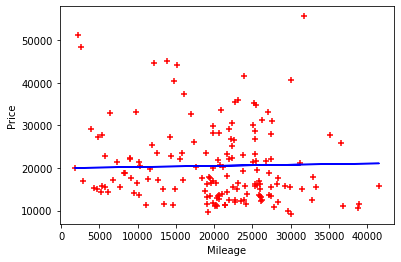

In [8]:
## 2. Chart the original data and the equation on the chart.
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(x_test,y_test,color="red",marker="+")#,figsize=(10,10))
plt.plot(x_test,Y_test,color="blue")

In [9]:
## 3.Find the equation's  𝑅2  score

error_score_test=metrics.r2_score(x_test,Y_test)
print(error_score_test)

0.04880945395008118


# Tasks, Part 2

In [10]:
df.Mileage=df["Mileage"]/1000 

In [11]:
# load the dataset
inde=df.drop(["Make","Model", "Trim", "Type","Price"],axis=1)
dep= df["Price"]

# split the dataset
i_train, i_test, d_train, d_test = train_test_split(inde, dep, test_size = 0.3, random_state = 3)

# Model fitting

reg=LinearRegression()
reg.fit(i_train,d_train)
pred_train=reg.predict(i_train)
error_score_train = metrics.r2_score(d_train,pred_train)
reg.fit(i_test,d_test)
pred_test=reg.predict(i_test)

In [12]:
## 1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

#linear regression equation
coe_test=reg.coef_
inter_test=reg.intercept_
Y_test=(i_test*coe_test)+inter_test
Y_test.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
123,3790.778234,39462.308081,-845.457526,-1.920289,12989.359396,3080.813188,9779.453734
648,1625.276368,22649.365192,2931.257160,-1.920289,12989.359396,5836.422302,5836.422302
720,4617.006101,22649.365192,2495.482388,-1.920289,12989.359396,5836.422302,9779.453734
623,4444.672490,22649.365192,3221.773674,-1.920289,5836.422302,5836.422302,5836.422302
612,3242.596122,22649.365192,3221.773674,-1.920289,5836.422302,5836.422302,9779.453734


In [13]:
reg_diff = pd.DataFrame({'Actual value': d_test, 'Predicted value': pred_test})
reg_diff.head()

,Actual value,Predicted value
123,35165.759369,33236.801007
648,23249.841685,16847.648619
720,30800.658389,23346.635012
623,16706.674068,12804.624161
612,15977.911084,15545.579225


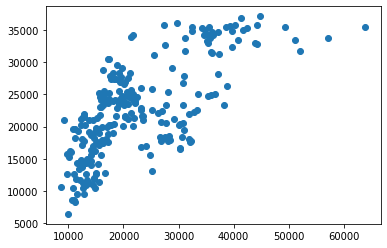

In [14]:
plt.scatter(d_test,pred_test)

In [15]:
## 2.  Find the equation's  𝑅2  score 
#error_score
error_score_test=metrics.r2_score(d_test,pred_test)
print(error_score_test)

0.5083639932121422


In [16]:
## 3. Find the combination of the factors that is the best predictor for price.

corr = df.corr()["Price"].sort_values(ascending=False)[1:]
#print(corr)
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.4]
print(relevant_features)


Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Name: Price, dtype: float64


#  Tasks, Hard mode

In [17]:
print(df.Make.value_counts())
print(df.Model.value_counts())
print(df.Type.value_counts())

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64
Malibu         60
AVEO           60
Cavalier       60
Ion            50
Cobalt         50
9_3 HO         40
Vibe           30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Impala         30
Grand Prix     30
9_5            30
Deville        30
Lesabre        20
Corvette       20
9_3            20
9_5 HO         20
G6             20
Grand Am       20
Park Avenue    20
Sunfire        10
Century        10
GTO            10
Classic        10
XLR-V8         10
STS-V8         10
STS-V6         10
CTS            10
CST-V          10
L Series       10
9-2X AWD        4
Name: Model, dtype: int64
Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer 

In [19]:
ron=LabelEncoder()
df['Model']=ron.fit_transform(df["Model"])
print(df.Model.value_counts())

24    60
5     60
9     60
20    50
12    50
2     40
30    30
6     30
25    30
22    30
19    30
18    30
3     30
14    30
23    20
13    20
1     20
4     20
15    20
17    20
26    20
29    10
10    10
16    10
11    10
31    10
28    10
27    10
8     10
7     10
21    10
0      4
Name: Model, dtype: int64


In [20]:
df['Make']=ron.fit_transform(df["Make"])
print(df.Make.value_counts())

2    320
3    150
4    114
0     80
1     80
5     60
Name: Make, dtype: int64


In [21]:
lb=LabelBinarizer()
df['Type']=lb.fit_transform(df["Type"])
print(df.Type.value_counts())

0    754
1     50
Name: Type, dtype: int64


In [22]:

df.corr()


,Price,Mileage,Make,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,-0.131644,-0.026599,0.508018,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,0.028632,-0.026810,0.027436,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Make,-0.131644,0.028632,1.000000,-0.295619,0.117119,-0.474727,-0.421690,-0.142858,-0.124232,-0.124200,-0.065295
Model,-0.026599,-0.026810,-0.295619,1.000000,-0.149113,0.359248,0.347102,-0.027162,-0.088165,0.022747,-0.082459
Type,0.508018,0.027436,0.117119,-0.149113,1.000000,0.061533,0.065886,-0.462921,0.147689,-0.043637,0.009285
Cylinder,0.569086,-0.029461,-0.474727,0.359248,0.061533,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,-0.421690,0.347102,0.065886,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,-0.142858,-0.027162,-0.462921,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,-0.124232,-0.088165,0.147689,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.124200,0.022747,-0.043637,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444


In [23]:
## 2. Find the combination of the factors that is the best predictor for price.

corr = df.corr()["Price"].sort_values(ascending=False)[1:]
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.4]
print(relevant_features)


Cylinder    0.569086
Liter       0.558146
Type        0.508018
Cruise      0.430851
Name: Price, dtype: float64
